In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyLDAvis.sklearn
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\Mikhail\Anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
C:\Users\Mikhail\Anaconda3\lib\site-packages\nltk\lm\counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict
C:\Users\Mikhail\Anaconda3\lib\site-packages\nltk\lm\vocabulary.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Counter, Iterable


In [2]:
df = pd.read_csv('spam_dataset_preprocessed.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)
df.head()

,class,mail,label,lemmatized,stemmed
0,real,Subject: enron methanol ; meter # : 988291\r\n...,0,methanol meter follow note give monday prelimi...,methanol meter follow note gave monday prelimi...
1,real,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom january see attach file hplnol xl hpln...,hpl nom januari see attach file hplnol xl hpln...
2,real,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonderful time ye...,neon retreat ho ho ho around wonder time year ...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main trend abas...,photoshop window offic cheap main trend abas d...
4,real,Subject: re : indian springs\r\nthis deal is t...,0,indian spring deal book teco pvr revenue under...,indian spring deal book teco pvr revenu unders...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 5 columns):
class         5171 non-null object
mail          5171 non-null object
label         5171 non-null int64
lemmatized    5153 non-null object
stemmed       5153 non-null object
dtypes: int64(1), object(4)
memory usage: 202.1+ KB


In [4]:
df.isnull().sum()

class          0
mail           0
label          0
lemmatized    18
stemmed       18
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,class,mail,label,lemmatized,stemmed
154,spam,Subject: \r\n,1,NaN,NaN
182,spam,Subject: \r\n,1,NaN,NaN
296,spam,Subject: \r\n,1,NaN,NaN
363,spam,Subject: \r\n,1,NaN,NaN
1130,spam,Subject: \r\n,1,NaN,NaN
1279,spam,Subject: \r\n,1,NaN,NaN
1369,spam,Subject: \r\n,1,NaN,NaN
1508,spam,Subject: re [ 8 ]\r\n,1,NaN,NaN
2184,spam,Subject: \r\n,1,NaN,NaN
2538,spam,Subject: \r\n,1,NaN,NaN


In [6]:
df = df.dropna()
df.isnull().sum()

class         0
mail          0
label         0
lemmatized    0
stemmed       0
dtype: int64

In [7]:
spam = df.loc[df['label'] == 1]
real = df.loc[df['label'] == 0]
print('Spam email percentage:', len(spam) / (len(real) + len(spam)) * 100)
print('Regular email percentage:', len(real) / (len(real) + len(spam)) * 100)

Spam email percentage: 28.740539491558316
Regular email percentage: 71.25946050844169


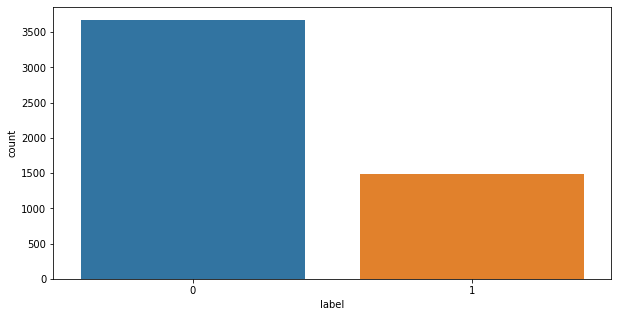

In [8]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'label');

In [9]:
print('SPAM EMAIL EXAMPLE:\n', df.iloc[3].mail, '\nNOT SPAM EMAIL EXAMPLE:\n', df.iloc[4].mail)

SPAM EMAIL EXAMPLE:
 Subject: photoshop , windows , office . cheap . main trending
abasements darer prudently fortuitous undergone
lighthearted charm orinoco taster
railroad affluent pornographic cuvier
irvin parkhouse blameworthy chlorophyll
robed diagrammatic fogarty clears bayda
inconveniencing managing represented smartness hashish
academies shareholders unload badness
danielson pure caffein
spaniard chargeable levin
 
NOT SPAM EMAIL EXAMPLE:
 Subject: re : indian springs
this deal is to book the teco pvr revenue . it is my understanding that teco
just sends us a check , i haven ' t received an answer as to whether there is a
predermined price associated with this deal or if teco just lets us know what
we are giving . i can continue to chase this deal down if you need .


In [10]:
def make_word_cloud(df):
    words = df['lemmatized']
    clas = df['class'].iloc[0]
    all_words = []
    for l in words:
        l = l.split(' ')
        all_words.extend(l)

    m_common = FreqDist(all_words).most_common(100)
    wordcloud = WordCloud(width=500, height=200, background_color='white').generate(str(m_common))
    fig = plt.figure(figsize=(12,6), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Top 100 Most Common Words in {clas} emails', fontsize=30)
    plt.tight_layout(pad=0)
    plt.show()

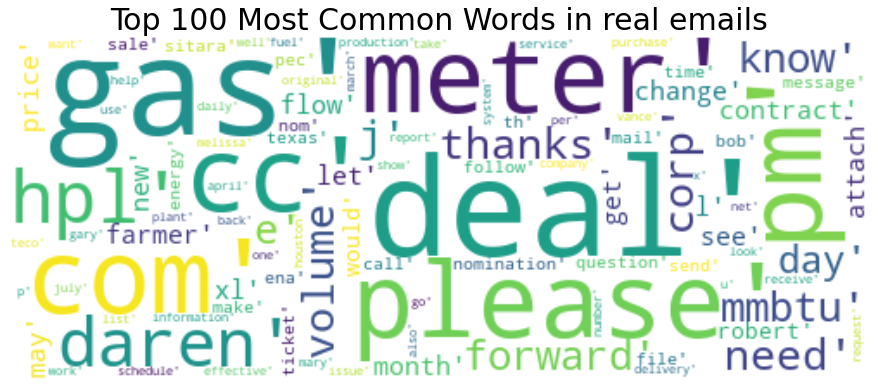

In [11]:
make_word_cloud(real)

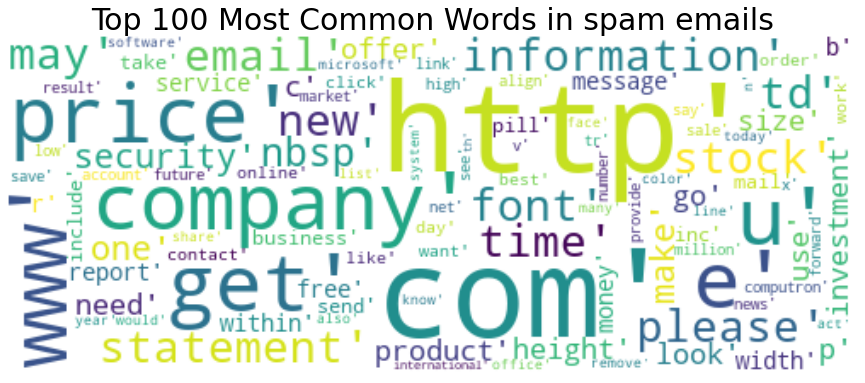

In [12]:
make_word_cloud(spam)

In [13]:
def plot_freq(df):
    words = df['lemmatized']
    clas = df['class'].iloc[0]
    all_words = []
    for l in words:
        l = l.split(' ')
        all_words.extend(l)

    common_top = FreqDist(all_words).most_common(25)
    x, y = zip(*common_top)

    fig = plt.figure(figsize=(12,6), facecolor='white')
    plt.margins(0.02)
    plt.bar(x, y)
    plt.xlabel('Words', fontsize=15)
    plt.ylabel('Word Count', fontsize=15)
    plt.yticks(fontsize=10)
    plt.xticks(rotation=60, fontsize=10)
    plt.title(f'Frequency of 25 Most Common Words in {clas} emails', fontsize=20)
    plt.show()

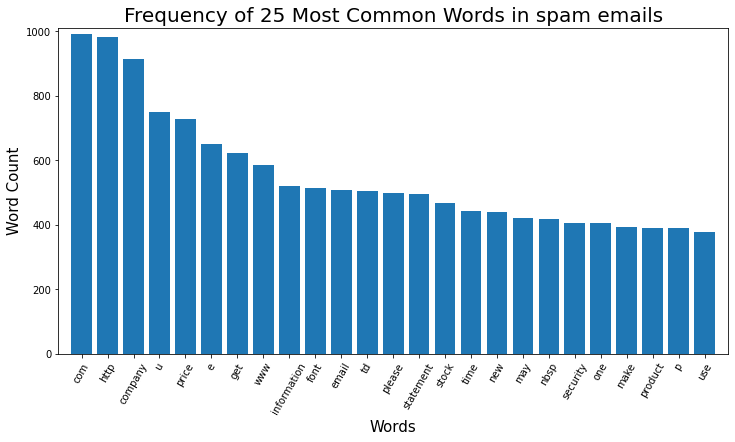

In [14]:
plot_freq(spam)

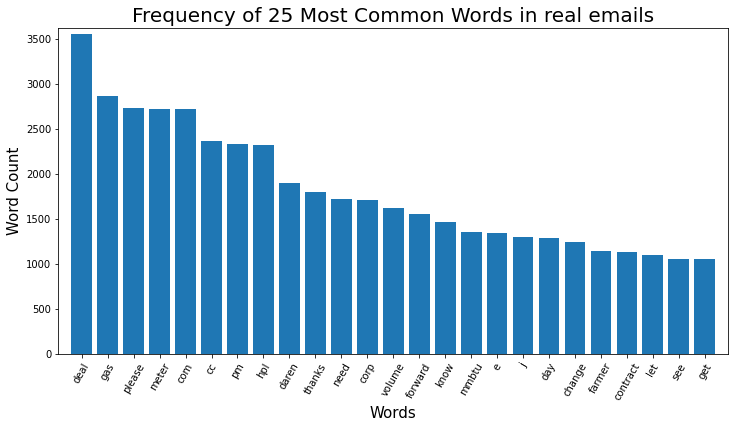

In [15]:
plot_freq(real)

In [16]:
def encode_data(df):
    tf_vect = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
    tf = tf_vect.fit_transform(df['lemmatized'].values)
    tf_feature_names = tf_vect.get_feature_names()
    pd_tf = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
    return tf, tf_feature_names, pd_tf

spam_tf, spam_feature_names, pd_spam_tf = encode_data(spam)
real_tf, real_feature_names, pd_real_tf = encode_data(real)

In [17]:
def model_topics(tf, features, topic_num=5, top_w_num=5):
    lda_model = LatentDirichletAllocation(n_components=topic_num, learning_method='online', max_iter=500, random_state=0).fit(tf)
    top_words = top_w_num
    for topic_idx, topic in enumerate(lda_model.components_):
        print(f"Topic {topic_idx+1}: ", " ".join([features[i] for i in topic.argsort()[:-top_words - 1:-1]]))
        
    return lda_model

lda_model_spam = model_topics(spam_tf, spam_feature_names)
print('\n')
lda_model_real = model_topics(real_tf, real_feature_names)

Topic 1:  get http pill com online
Topic 2:  http font td com email
Topic 3:  price software xp adobe microsoft
Topic 4:  com computron www contact message
Topic 5:  company statement stock security information


Topic 1:  gas meter corp cc mmbtu
Topic 2:  please need would know get
Topic 3:  deal meter hpl daren gas
Topic 4:  xl hpl pec nom com
Topic 5:  com message mail send please


In [18]:
def make_panel(model, tf_vec, tf, feature_names, df):
    tf_vec.fit_transform(df['lemmatized'].values)
    tf_vec._validate_vocabulary()
    pyLDAvis.enable_notebook()
    panel = pyLDAvis.sklearn.prepare(model, tf, tf_vec, mds='tsne', vocab=feature_names)
    pyLDAvis.show(panel)
    
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
make_panel(lda_model_spam, tf_vectorizer, spam_tf, spam_feature_names, spam)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [12/Jul/2020 18:41:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Jul/2020 18:41:53] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [12/Jul/2020 18:41:53] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Jul/2020 18:41:53] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Jul/2020 18:41:53] code 404, message Not Found
127.0.0.1 - - [12/Jul/2020 18:41:53] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...


In [ ]:
make_panel(lda_model_real, tf_vectorizer, real_tf, real_feature_names, real)

In [22]:
def encode_data_tf(df):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)
    tfidf = tfidf_vectorizer.fit_transform(df['lemmatized'])
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    pd_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
    return tfidf, tfidf_feature_names, pd_tfidf

spam_tfidf, spam_feature_names_idf, pd_spam_idf = encode_data_tf(spam)
real_tfidf, real_feature_names_idf, pd_real_idf = encode_data_tf(real)

In [23]:
_, _, pd_tfidf = encode_data_tf(df)
_, _, pd_tf = encode_data(df)
labels = df['label']
labels.reset_index(inplace=True, drop=True)
pd_tfidf.reset_index(inplace=True)
pd_tf.reset_index(inplace=True)
pd_tf_f = pd.concat([labels, pd_tf], axis=1)
pd_tfidf_f = pd.concat([labels, pd_tfidf], axis=1)

In [ ]:
pd_tfidf_f.to_csv('tfidf_dataset.csv')
pd_tf_f.to_csv('word_bag_dataset.csv')

In [24]:
def model_topics_tf(tfidf, features, topic_num=5, top_w_num=5):
    nmf = NMF(n_components=topic_num, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
    top_words = top_w_num
    for topic_idx, topic in enumerate(nmf.components_):
        print(f"Topic {topic_idx+1}: ", " ".join([features[i] for i in topic.argsort()[:-top_words - 1:-1]]))
    return nmf

nmf_spam = model_topics_tf(spam_tfidf, spam_feature_names_idf)
print('\n')
nmf_real = model_topics_tf(real_tfidf, real_feature_names_idf)

Topic 1:  prescription cialis get viagra pill
Topic 2:  company statement stock security investment
Topic 3:  computron contact message com remove
Topic 4:  xp software adobe window professional
Topic 5:  http com www want pain


Topic 1:  xl hplno file see hplo
Topic 2:  deal meter daren volume please
Topic 3:  hpl tap teco actuals iferc
Topic 4:  tu com utility actual texas
Topic 5:  nomination mmbtu eastrans calpine fuel
